## Inicializando Librerías

In [62]:
import sklearn
import numpy as np
import seaborn as sb
import matplotlib.pylab as plt
import pandas as pd

In [63]:
df = pd.read_csv('datos_banco.csv', encoding = "ISO-8859-1")

In [64]:
df.head(100)

,idPrestamo,target,monthly_debt_capacity,var_employment_time_in_months,approved_amount,approved_term,approved_interest_amount,var_net_income,person_gender,credit_history_marital_status,var_max_sbs_qual_12m,person_degree_type_desc,default_request_term,default_request_amount
0,LIBDISP9832897855,1,252.39,9.0,"1,200",6,289.11,1140.125000,MALE,C,NORMAL,Secundaria,1,0
1,LIBDISP9021501745,1,244.57,50.0,"2,200",12,696.15,1061.375000,FEMALE,S,NORMAL,Secundaria,0,0
2,LIBDISP4057314971,0,491.5,64.0,"1,000",3,84.99,2082.196667,FEMALE,S,NORMAL,Secundaria,0,0
3,LIBDISP8375185888,0,848.65,77.0,"1,500",6,221.53,3422.423333,MALE,S,NORMAL,Universitaria,0,0
4,LIBDISP9694463037,0,470.52,82.0,"1,000",3,91.34,1882.090000,FEMALE,S,NORMAL,Universitaria,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,LIBDISP3579151882,0,"1,272.57",76.0,"4,000",6,457.23,4620.158333,FEMALE,S,NORMAL,Universitaria,1,0
96,LIBDISP3039692386,0,"1,108.60",7.0,"5,000",12,"1,515.20",4224.471667,FEMALE,C,CPP,Postgrado,0,0
97,LIBDISP7498314648,0,276.86,9.0,"1,300",6,313.2,3267.280000,MALE,S,NORMAL,Universitaria,0,0
98,LIBDISP0384695640,1,457.63,26.0,"2,300",6,332.13,1830.500000,FEMALE,S,NORMAL,Carrera TÃÂ©cnica,0,0


In [65]:
df.shape

(1719, 14)

In [81]:
x_df = df.drop(["target","person_gender","default_request_term","default_request_amount"], axis = 1)
y_df = df["target"]

print("shape of x_df = ", x_df.shape)
print("shape of y_df = ", y_df.shape)

shape of x_df =  (1719, 10)
shape of y_df =  (1719,)


In [82]:
x_df.groupby('var_max_sbs_qual_12m').size()

var_max_sbs_qual_12m
CPP            202
DEFICIENTE      31
DUDOSO           1
NORMAL        1481
PERDIDA          4
dtype: int64

In [83]:
x_df["monthly_debt_capacity"] = x_df["monthly_debt_capacity"].replace(',','', regex=True)
x_df["monthly_debt_capacity"] = pd.to_numeric(x_df["monthly_debt_capacity"], downcast="float")

x_df["approved_amount"] = x_df["approved_amount"].replace(',','', regex=True)
x_df["approved_amount"] = pd.to_numeric(x_df["approved_amount"], downcast="float")

x_df["approved_interest_amount"] = x_df["approved_interest_amount"].replace(',','', regex=True)
x_df["approved_interest_amount"] = pd.to_numeric(x_df["approved_interest_amount"], downcast="float")



In [84]:
x_df.describe()

,monthly_debt_capacity,var_employment_time_in_months,approved_amount,approved_term,approved_interest_amount,var_net_income
count,1719.000000,1519.000000,1719.000000,1719.000000,1719.000000,1719.000000
mean,584.639282,33.979592,2136.998291,6.464805,407.184509,2693.545884
std,459.958984,26.889423,1504.947632,3.009842,407.703125,1825.694773
min,-158.750000,-1.000000,500.000000,1.000000,22.820000,0.000000
25%,350.760010,11.000000,1000.000000,6.000000,152.320007,1750.000000
50%,480.739990,26.000000,1500.000000,6.000000,281.390015,2373.758333
75%,660.820007,61.000000,2500.000000,6.000000,429.799988,3075.133333
max,7243.200195,87.000000,12200.000000,12.000000,2311.120117,28587.000000


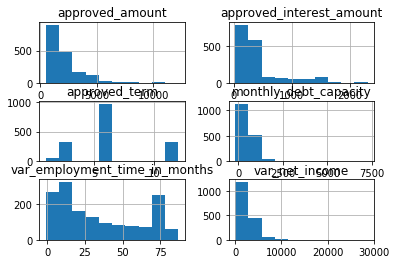

In [86]:
x_df.hist();


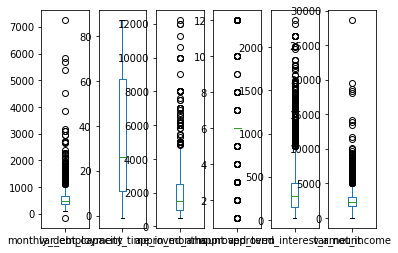

In [87]:
x_df.plot(kind='box', subplots=True);

### Encontrando Valores Faltantes


In [88]:
num_vars = x_df.select_dtypes(include=["int64","float64"]).columns

In [89]:
num_vars 

Index(['var_employment_time_in_months', 'approved_term', 'var_net_income'], dtype='object')

In [92]:
x_df[num_vars].isnull().sum()

var_employment_time_in_months    200
approved_term                      0
var_net_income                     0
dtype: int64

In [93]:
from sklearn.impute import SimpleImputer

imputer_mean = SimpleImputer(strategy = "mean")

In [94]:
imputer_mean.fit(x_df[num_vars])

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

In [95]:
imputer_mean.statistics_

array([  33.97959184,    6.46480512, 2693.54588356])

In [96]:
imputer_mean.transform(x_df[num_vars])

array([[   9.      ,    6.      , 1140.125   ],
       [  50.      ,   12.      , 1061.375   ],
       [  64.      ,    3.      , 2082.196667],
       ...,
       [  56.      ,    6.      , 2768.5     ],
       [  80.      ,    3.      , 2139.258333],
       [  12.      ,    3.      , 2083.33    ]])

In [97]:
x_df[num_vars] = imputer_mean.transform(x_df[num_vars])

In [98]:
x_df[num_vars].isnull().sum()

var_employment_time_in_months    0
approved_term                    0
var_net_income                   0
dtype: int64